In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report

In [2]:
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbr.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [5]:
y_pred = gbr.predict(X_test)

In [6]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.2939973248643864, 0.7756446042829697)

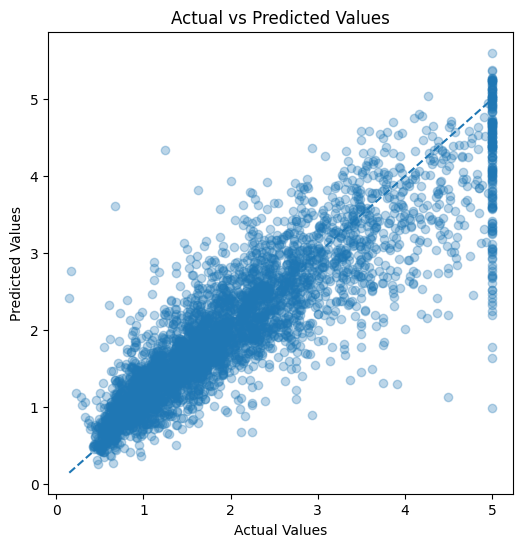

In [7]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [8]:
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.8]
results = []

for lr in learning_rates:
  model = GradientBoostingRegressor(
      n_estimators=100,
      learning_rate=lr,
      max_depth = 3,
      random_state = 42

  )
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  results.append((lr, r2_score(y_test, preds)))

pd.DataFrame(results, columns=["Learning Rate", "R2 Score"])

,Learning Rate,R2 Score
0,0.01,0.493068
1,0.05,0.742843
2,0.10,0.775645
3,0.20,0.798105
4,0.80,0.805044


In [ ]:
depths = [1,2,3,4,7]
results = []

for depth in depths:
  model = GradientBoostingRegressor(
      n_estimators=100,
      learning_rate=0.1,
      max_depth = depth,
      random_state = 42

  )
  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  results.append((depth, r2_score(y_test, preds)))

pd.DataFrame(results, columns=["Max_Depth", "R2 Score"])

,Max_Depth,R2 Score
0,1,0.626627
1,2,0.736878
2,3,0.775645
3,4,0.801975
4,7,0.834076


In [10]:
feature_importance = gbr.feature_importances_

importance_df = pd.Series(
    feature_importance, index=X.columns
).sort_values(ascending=False)

importance_df.head(10)

MedInc        0.604259
AveOccup      0.122835
Longitude     0.109853
Latitude      0.098533
HouseAge      0.034113
AveRooms      0.023948
AveBedrms     0.005106
Population    0.001354
dtype: float64

In [13]:
from sklearn.model_selection import GridSearchCV

# parameter grid for GradientBoosting
param_grid = {
    'n_estimators': [20, 50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 1.0],
    'max_depth': [1, 2, 3, 4]
}

# GridSearchCV
grid = GridSearchCV(
    estimator= GradientBoostingRegressor(),
    param_grid=param_grid,
    scoring='r2',  # how to measure
    cv=5, # checks model 5 times
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred_grid = best_model.predict(X_test)

print("Best Parameters Found:")
print(grid.best_params_)

print("\nR2 Score:", r2_score(y_test, y_pred_grid))
print("MSE:", mean_squared_error(y_test, y_pred_grid))

Best Parameters Found:
{'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 200}

R2 Score: 0.8280209486734587
MSE: 0.2253628929276523
